In [1]:
%pylab widget

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [336]:
verts = array([
 [1, 1, 1],
 [-1, 1, 1],
 [-1, -1, 1],
 [1, -1, 1],
 [1, 1, -1],
 [-1, 1, -1],
 [-1, -1, -1],
 [1, -1, -1],
], dtype=float)

tris = array([
    [0, 1, 2],
    [0, 2, 3],
    [4, 0, 3],
    [4, 3, 7],
    [5, 4, 7],
    [5, 7, 6],
    [1, 5, 6],
    [1, 6, 2],
    [4, 5, 1],
    [4, 1, 0],
    [2, 6, 7],
    [2, 7, 3]
], dtype=int)

lines = array([
    [0, 1], [1, 2], [2, 3], [3, 0],
    [4, 5], [5, 6], [6, 7], [7, 4],
    [0, 4], [1, 5], [2, 6], [3, 7]
], dtype=int)

(-1.4666666666666668,
 1.4666666666666668,
 -1.4666666666666668,
 1.4666666666666668,
 -1.1,
 1.1)

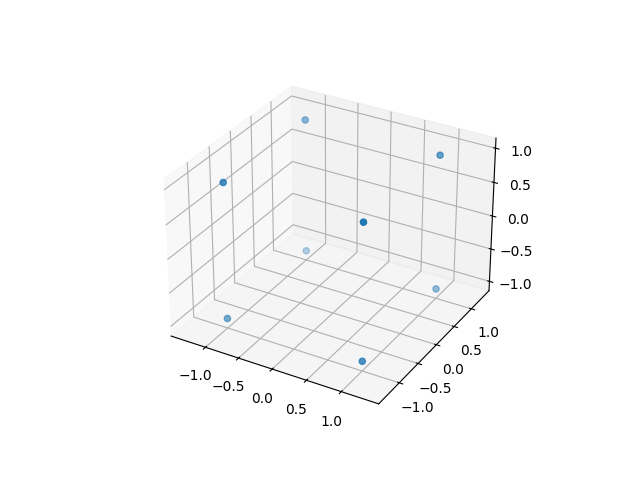

In [337]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(verts[:, 0], verts[:, 1], verts[:, 2])
ax.axis('equal')

In [338]:
def plot_poly(verts, poly_inds, ls):
    '''
    verts: list of vertex coordinates [x, y, z]
    poly_inds: list of lines or polygons, indexing verts
    '''
    xs = []
    ys = []
    for ind in poly_inds:
        for pt in verts[ind]:
            xs.append(pt[0])
            ys.append(pt[1])
        if len(ind) > 2:  # close the polygon
            pt0 = verts[ind][0]
            xs.append(pt0[0])
            ys.append(pt0[1])
        xs.append(None)
        ys.append(None)
    ls.set_data(xs, ys)

def plot_poly2(verts, poly_inds, ax=None):
    '''
    verts: list of vertex coordinates [x, y, z]
    poly_inds: list of lines or polygons, indexing verts
    '''
    if ax is None:
        ax = gca()
    for ind in poly_inds:
        pts = verts[ind]
        ax.plot(pts[:, 0], pts[:, 1])

array([[ 0.45390043,  0.32104951,  0.        ],
       [ 0.01992606,  0.15271106,  0.        ],
       [ 0.02181815, -0.30121939,  0.        ],
       [ 0.52040557, -0.35471263,  0.        ],
       [-0.05028664,  0.69425261,  0.        ],
       [-0.42919726,  0.29254431,  0.        ],
       [-0.48818999, -0.34530295,  0.        ],
       [-0.06437552, -0.49336664,  0.        ]])

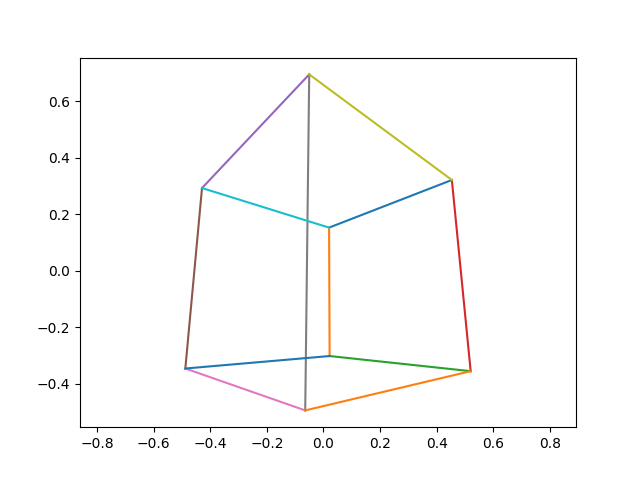

In [340]:
fig, ax = plt.subplots()
ax.axis('equal')

m_tx = h_proj(1.0) @ h_trans(0, 0, 3) @ h_rot_x(.2) @ h_rot_y(0.85)
res = hom_to_cart(inner(h_verts, m_tx))
plot_poly2(res, lines, ax)
res

In [158]:
def cart_to_hom(c_verts):
    tmp = empty((c_verts.shape[0], 4), dtype=float)
    tmp[:, 0:3] = c_verts
    tmp[:, 3] = 1
    return tmp

def hom_to_cart(h_verts):
    return (h_verts[:, 0:3].transpose() / h_verts[:, 3]).transpose()

def h_rot_x(r_x):
    return array([
        [1, 0, 0, 0],
        [0, cos(r_x), -sin(r_x), 0],
        [0, sin(r_x), cos(r_x), 0],
        [0, 0, 0, 1]
    ])

def h_rot_y(r_y):    
    return array([
        [cos(r_y), 0, sin(r_y), 0],
        [0, 1, 0, 0],
        [-sin(r_y), 0, cos(r_y), 0],
        [0, 0, 0, 1]
    ])

def h_rot_z(r_z):
    return array([
        [cos(r_z), -sin(r_z), 0, 0],
        [sin(r_z), cos(r_z), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

def h_trans(x, y, z):
    return array([
        [1, 0, 0, x],
        [0, 1, 0, y],
        [0, 0, 1, z],
        [0, 0, 0, 1]
    ])

def h_scale(x, y, z):
    return array([
        [x, 0, 0, 0],
        [0, y, 0, 0],
        [0, 0, z, 0],
        [0, 0, 0, 1]
    ])

def h_proj(d):
    return array([
        [d, 0, 0, 0],
        [0, d, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 1, 0]
    ])

In [159]:
h_verts = cart_to_hom(verts)
h_verts

array([[ 1.,  1.,  1.,  1.],
       [-1.,  1.,  1.,  1.],
       [-1., -1.,  1.,  1.],
       [ 1., -1.,  1.,  1.],
       [ 1.,  1., -1.,  1.],
       [-1.,  1., -1.,  1.],
       [-1., -1., -1.,  1.],
       [ 1., -1., -1.,  1.]])

In [165]:
m_tx = h_trans(2, 0, 0) @ h_proj(2.0)
res = hom_to_cart(inner(h_verts, m_tx))

print('tx\n', m_tx)
res

tx
 [[2. 0. 2. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]


array([[ 4.,  2.,  0.],
       [ 0.,  2.,  0.],
       [ 0., -2.,  0.],
       [ 4., -2.,  0.],
       [-0., -2., -0.],
       [ 4., -2., -0.],
       [ 4.,  2., -0.],
       [-0.,  2., -0.]])

# Try to load file

In [314]:
fName = "/home/michael/pio_wsp/openscad/valve2.obj"
!cat $fName

# Blender 3.4.1
# www.blender.org
o valve
v -18.144602 -4.141421 -2.085507
v -18.243628 -4.273738 -1.003189
v -18.218246 -3.009567 -2.147151
v -18.532673 -3.009567 -1.003189
v -18.249310 -1.003189 -2.167457
v -18.661884 -1.003189 -1.003189
v -17.054211 -4.205796 -2.104979
v -17.054211 -4.763570 -1.003189
v -17.124165 -3.143728 -2.150400
v -16.413033 -2.443383 -1.003189
v -17.769512 -1.003189 -2.167457
v -16.975159 -1.003189 -1.003189
v -7.022322 -16.403261 -2.169703
v -7.022322 -17.049232 -1.003190
v -5.015944 -16.369856 -2.147887
v -5.015944 -17.065617 -1.003190
v -3.704415 -16.193041 -2.098174
v -3.025200 -16.423794 -0.928928
v -1.825890 -16.101246 -0.210628
v -9.215888 -16.232393 -1.055573
v -14.280432 -6.208934 -2.107589
v -14.589242 -6.494002 -1.003189
v -14.962975 -4.819910 -2.083153
v -15.592430 -5.505776 -1.003189
v -14.307933 -4.160758 -1.467059
v -15.645518 -3.901963 -2.058717
v -15.005169 -3.555139 -0.880235
v -12.173833 -14.163828 -2.086842
v -12.317148 -14.287860 -1.003189

In [341]:
verts = []
faces = []
with open(fName, 'r') as f:
    while True:
        l = f.readline()
        if len(l) <= 0:
            break
        l_ = l.split()
        
        if l_[0] == 'v':
            verts.append([float(v) for v in l_[1:]])
        elif l_[0] == 'f':
            faces.append([int(v.split('/')[0]) - 1 for v in l_[1:]])
            
verts = array(verts)
# tris = array(faces)

(-20.584804000000002,
 20.809538,
 -20.637858,
 20.756484,
 -17.719980250000003,
 13.325776250000002)

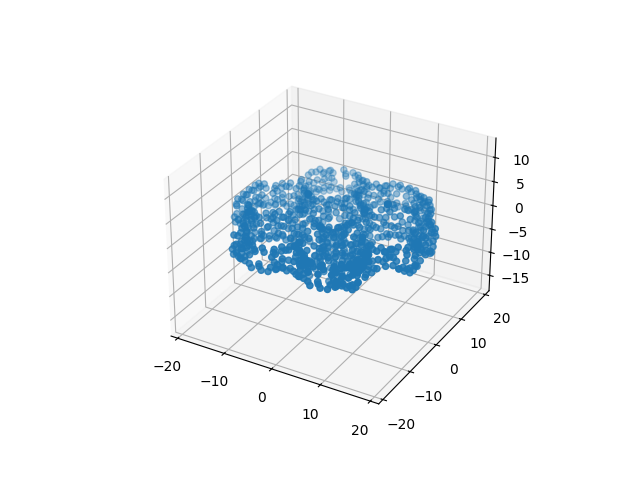

In [321]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(verts[:, 0], verts[:, 1], verts[:, 2])
ax.axis('equal')

array([[-0.6681685 , -0.11791659,  0.        ],
       [-0.65113357, -0.14761977,  0.        ],
       [-0.65167224, -0.08660601,  0.        ],
       ...,
       [ 0.5824696 ,  0.06570399,  0.        ],
       [ 0.56979905,  0.13832018,  0.        ],
       [ 0.5581925 ,  0.09774435,  0.        ]])

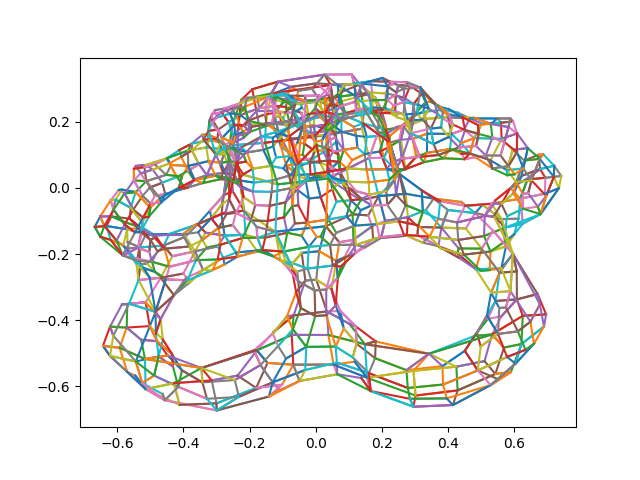

In [344]:
close()
fig, ax = plt.subplots()
ax.axis('equal')

m_tx = h_proj(1.0) @ h_trans(0, 0, 30) @ h_rot_x(.85) @ h_rot_y(0.15)
res = hom_to_cart(inner(cart_to_hom(verts), m_tx))
plot_poly2(res, faces, ax)
res